<a href="https://colab.research.google.com/github/mohith01/Intro_to_Keras_Workshop/blob/main/Keras_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why Keras?

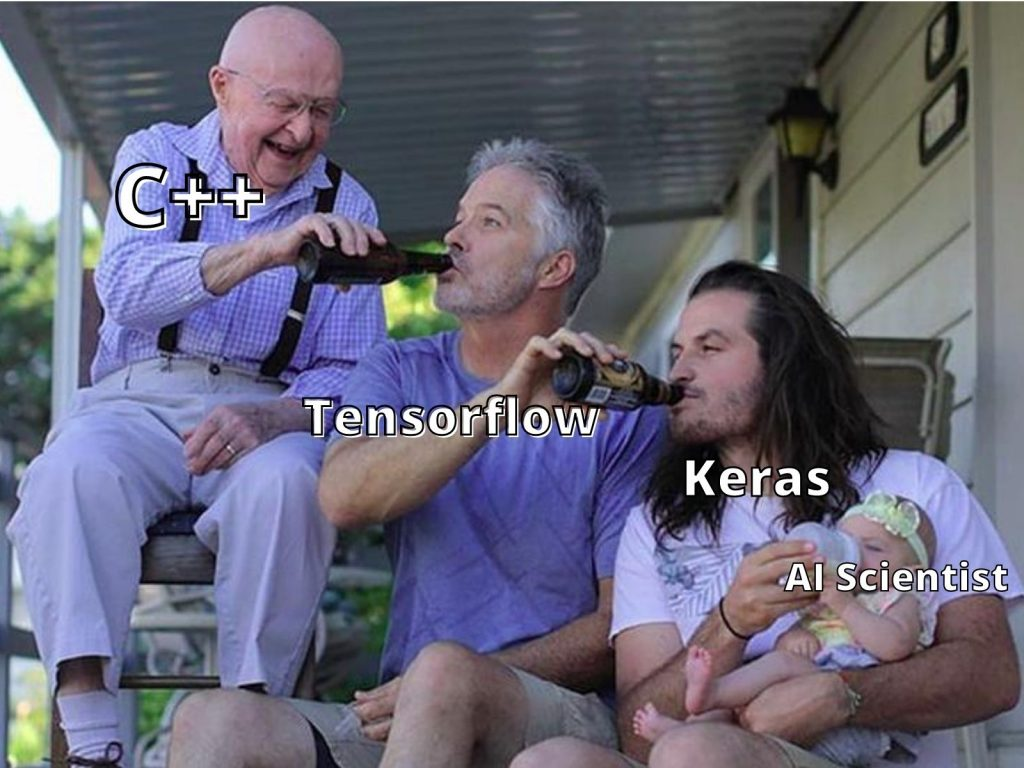

Keras is a high-level neural network API written in Python, designed to be user-friendly and modular. It can run on top of TensorFlow, as well as other deep learning frameworks. Keras provides a simple and intuitive interface to build, train, and evaluate deep learning models. It supports a wide range of neural network architectures and is suitable for both beginners and advanced users. When used with TensorFlow, Keras provides additional functionality and customization options, while still maintaining its ease of use.

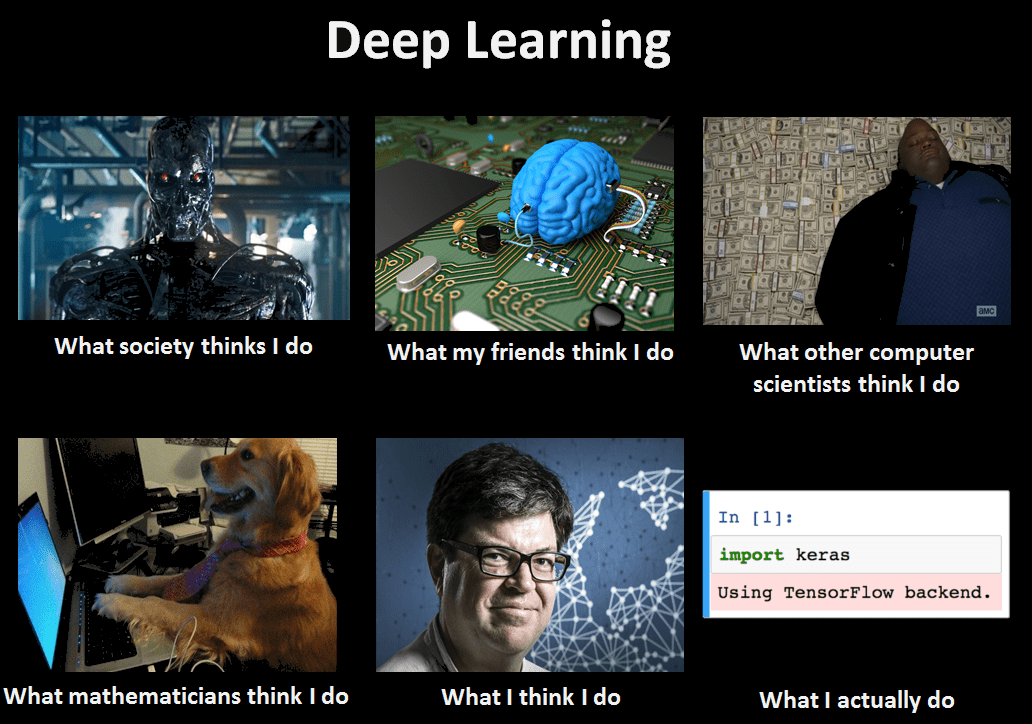

# Keras Installation

For Windows, macOS and ubuntu

```py
pip install --upgrade pip 
pip install tensorflow
```

Requires Latest pip >19.0 for windows and >20.3 for macOS

Using Miniconda and Installing

#Building Blocks of a Neural Network

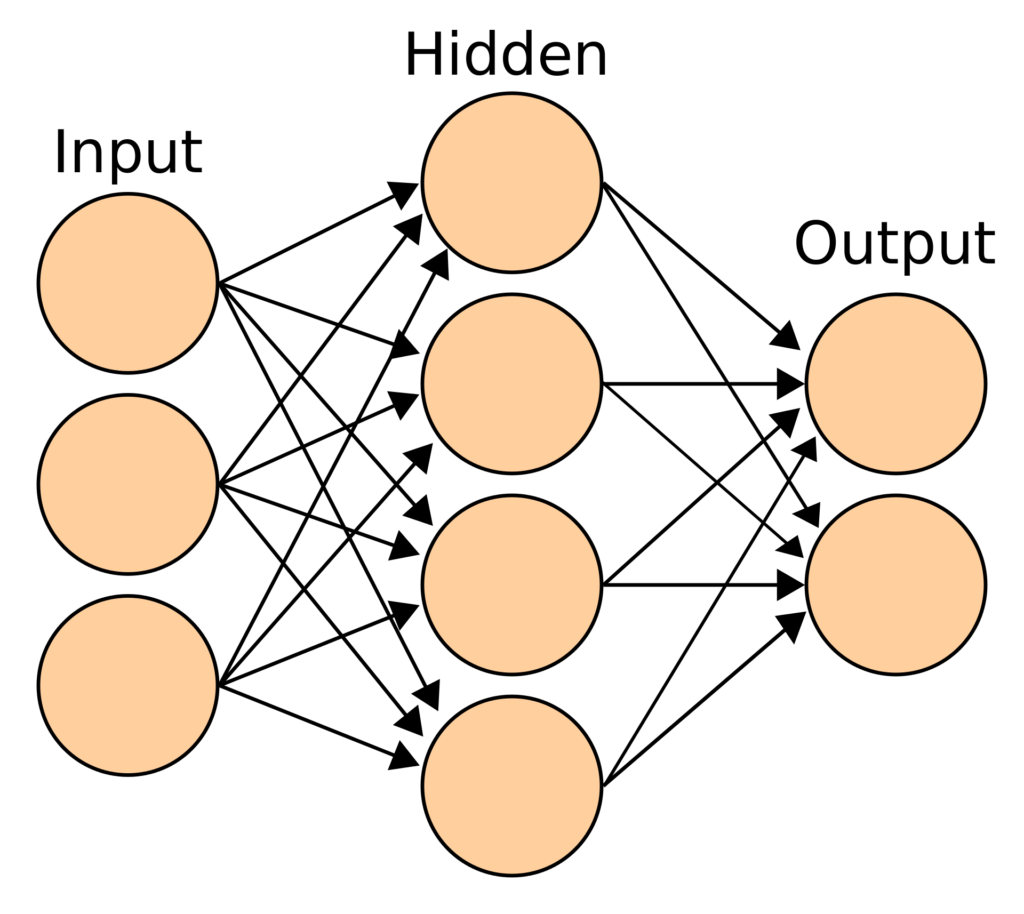

## Input Layer

```py
from tensorflow.keras.layers import Input

input1 = Input(shape = (28,28,1))
```

Input Layer Defines the basic input parameters of the model. We dont need to use this in Sequential model implementation, but it's required for functional API models

## Dense Layer

In any neural network, The dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer. This layer is the most commonly used layer in artificial neural network networks.

```py
from tensorflow.keras.layers import Dense

dense = Dense(
  units,
  activation=None,
)

```

- Units define the basic and necessary parameters of the Keras dense layer which defines size of output from dense layer.

- Activation function is used for transformation of input values of neurons

An Activation Function decides whether a neuron should be activated or not. It introduces non-linearity to the network

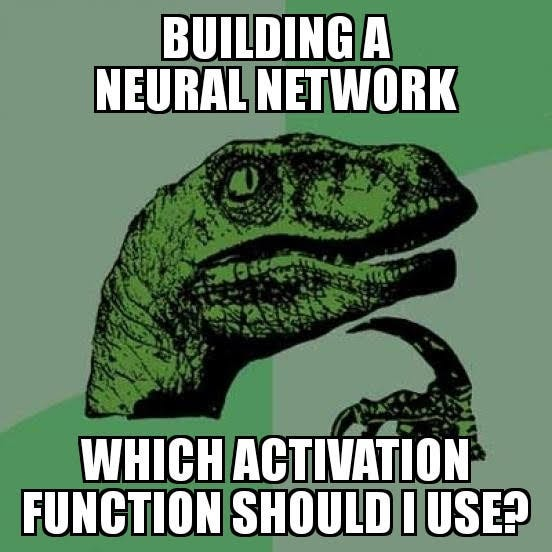

Some important activation layers are Relu, sigmoid, Softmax and Leakyrelu

##Creating your first neural network

Before we create, let's checkout our data and plot some samples

### Fashion MNIST

Loads the Fashion-MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

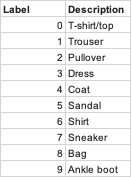


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
indices = np.random.RandomState(seed=42).permutation(x_train.shape[0])

In [ ]:
training_idx, valid_idx = indices[:50000], indices[50000:]

In [ ]:
x_train, x_valid, y_train, y_valid = x_train[training_idx,:], x_train[valid_idx,:], y_train[training_idx], y_train[valid_idx] 

In [ ]:
x_train.shape

(50000, 28, 28)

In [ ]:
x_valid.shape

(10000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_valid.shape

(10000, 28, 28)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))



Train: X=(50000, 28, 28), y=(50000,)
Test: X=(10000, 28, 28), y=(10000,)


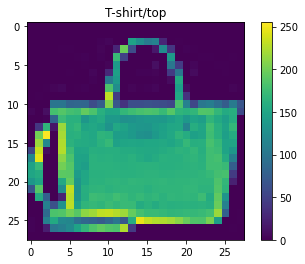

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.title(class_names[np.argmax(y_train[0])])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
x_train.shape

(50000, 28, 28)

In [ ]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train = x_train / 255.0 
x_test = x_test / 255.0
x_valid = x_valid / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_valid = tf.keras.utils.to_categorical(y_valid)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# Now Let's Do our first Neural Network

## There are three ways to define a model

##### Sequential Model

In [ ]:

model1 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape = (3)),
        tf.keras.layers.Dense(10, activation="linear", name="layer1"),
        tf.keras.layers.Dense(2,activation='linear',name="final_layer")
    ]
)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                40        
                                                                 
 final_layer (Dense)         (None, 2)                 22        
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


or

In [ ]:

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=(3)))
model2.add(tf.keras.layers.Dense(10, activation="linear", name="layer1"))
model2.add(tf.keras.layers.Dense(2,activation='linear',name="final_layer"))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                40        
                                                                 
 final_layer (Dense)         (None, 2)                 22        
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


Functional Model

In [ ]:
input1 = tf.keras.layers.Input(shape=(3))
hidden_layer = tf.keras.layers.Dense(10,activation='linear', name='hidden_layer')(input1)
final_layer = tf.keras.layers.Dense(2,activation="linear", name='final_layer')(hidden_layer)

model3 = tf.keras.models.Model(input1, final_layer)

In [ ]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3)]               0         
                                                                 
 hidden_layer (Dense)        (None, 10)                40        
                                                                 
 final_layer (Dense)         (None, 2)                 22        
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile()# By default compiles with optimizer RMSprop and loss as none

In [ ]:
import numpy as np
import pandas as pd

x = np.array([2,1,2])
print(x)

[2 1 2]


In [ ]:
x.shape

(3,)

In [ ]:
y = x.reshape(1,3,1)

In [ ]:
model3.predict(y)

1/1 [==============================] - 5s 5s/step


array([[-1.6908674 , -0.01836988]], dtype=float32)

The more the hidden layers, the more powerful the model becomes

# Now Let's try Designing a Deep Layer Network

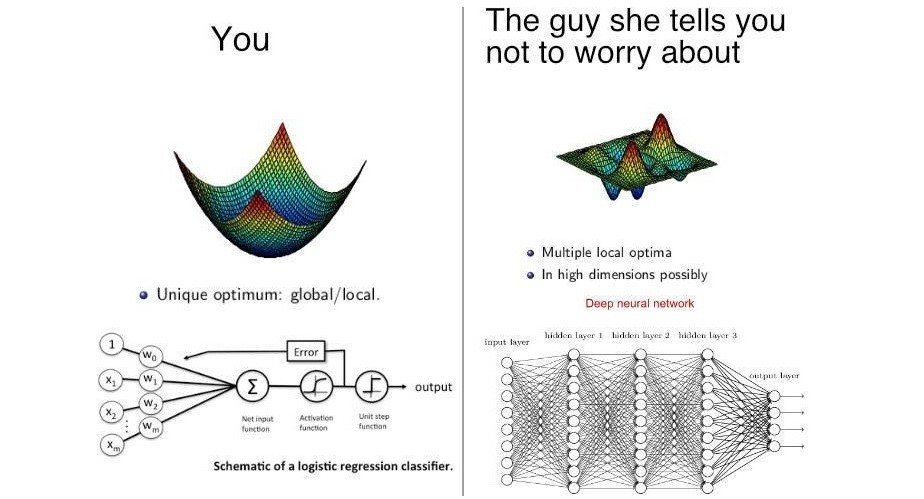

## Let's recap the data

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:

from tensorflow.keras.models import Model
from tensorflow.keras import layers, activations, optimizers

model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape = (28,28,)))
model.add(layers.Dense(512, activation="relu", name="layer1"))
model.add(layers.Dense(256, activation="relu", name="layer2"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation="relu", name="layer3"))
model.add(layers.Dense(10,activation='softmax',name="final_layer"))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 512)               401920    
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 layer3 (Dense)              (None, 64)                16448     
                                                                 
 final_layer (Dense)         (None, 10)                650       
                                                                 
Total params: 550,346
Trainable params: 550,346
Non-tr

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])



When you compile a model, you are letting model know about the optimizer, loss function and metrics to evaluate during training and testing

Optimizers are used to update the model weights so that they can minimize the loss function, whereas loss function is a measure of how well model is able to make predictions

Some Examples of Optimizers are:
SGD, Adam, RMSprop, Adagrad, Adamax, Nadam




MSE: This is common loss function used for regression problems

Binary CrossEntropy - Binary Classification

Categorical Crossentropy - Used for Multi class classification problems



In [ ]:
# Let's just do a forward pass and see what we get
test = x_train[0]
test=test.reshape((1,28,28,))

In [ ]:
model.predict(test)

1/1 [==============================] - 0s 156ms/step


array([[0.12743923, 0.11013003, 0.11038764, 0.08404322, 0.08021494,
        0.08779093, 0.05337318, 0.16432078, 0.08520754, 0.09709246]],
      dtype=float32)

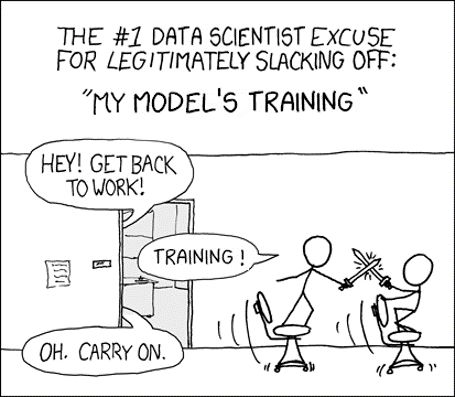

Now let's train our model

In [ ]:
x_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000, 10)

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=70,
          verbose=1,
          validation_data=(x_valid,y_valid), callbacks=tf.keras.callbacks.EarlyStopping(patience=7))

Epoch 1/70
391/391 [==============================] - 12s 13ms/step - loss: 0.5490 - accuracy: 0.8036 - val_loss: 0.3976 - val_accuracy: 0.8494
Epoch 2/70
391/391 [==============================] - 3s 8ms/step - loss: 0.3888 - accuracy: 0.8589 - val_loss: 0.3601 - val_accuracy: 0.8696
Epoch 3/70
391/391 [==============================] - 3s 8ms/step - loss: 0.3469 - accuracy: 0.8726 - val_loss: 0.3408 - val_accuracy: 0.8783
Epoch 4/70
391/391 [==============================] - 2s 5ms/step - loss: 0.3218 - accuracy: 0.8808 - val_loss: 0.3431 - val_accuracy: 0.8742
Epoch 5/70
391/391 [==============================] - 2s 5ms/step - loss: 0.3069 - accuracy: 0.8859 - val_loss: 0.3163 - val_accuracy: 0.8880
Epoch 6/70
391/391 [==============================] - 2s 6ms/step - loss: 0.2875 - accuracy: 0.8935 - val_loss: 0.3039 - val_accuracy: 0.8866
Epoch 7/70
391/391 [==============================] - 2s 5ms/step - loss: 0.2767 - accuracy: 0.8976 - val_loss: 0.3139 - val_accuracy: 0.8868
Epoc

**Evaluating the Model**

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8876


[0.33157989382743835, 0.8876000046730042]

# Let's talk about callbacks

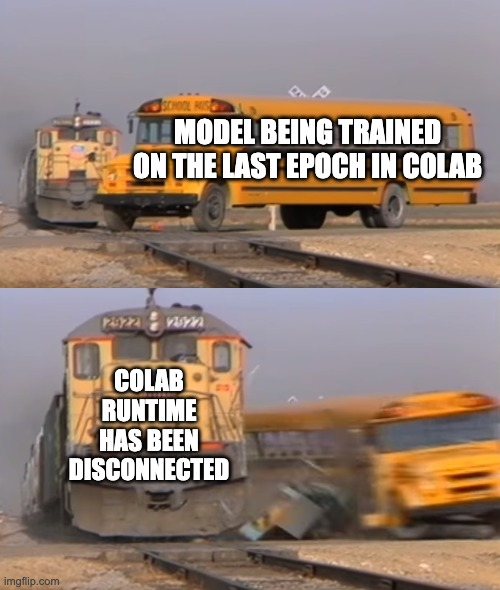

Callbacks are basically like lifesavers, They monitor your model to prevent overfitting, checkpoints the model and can also adjust learning rate

- Early Stopping - Used to prevent overfitting of model to training data. It monitors the validation loss during training and stops process when val loss stops improving
- Model Checkpoint - Used to save best version of model during training. It monitors val loss and saves model weights when val loss improves


```py
tf.keras.callbacks.EarlyStopping(patience=7),
tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
```

```py
tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor: str = "val_loss",
    save_best_only: bool = False,
    save_weights_only: bool = False,
    save_freq="epoch",
    initial_value_threshold=None,
)
```

## The Validation Problem



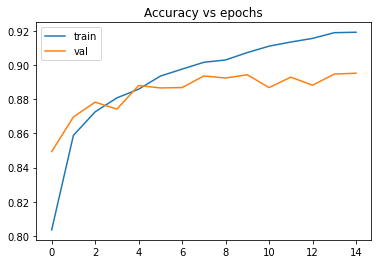

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy vs epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()

Overfitting

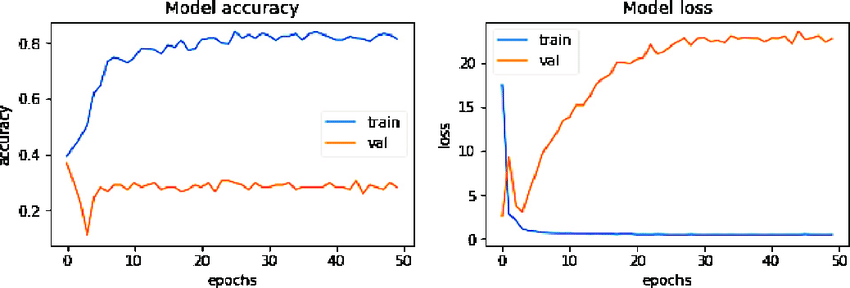

Overfitting can occur when a model performs well on the training dataset, but performs significantly poor on test or new data. 
There are many reasons that contribute to this:
1. Insufficient data
2. Complex Model - in case of neural networks, too many layers
3. Poor data - error prone, in case of image dataset noisy
4. Early stopping - stopping the model before it has completed training

#Introducing Convolution Neural Network

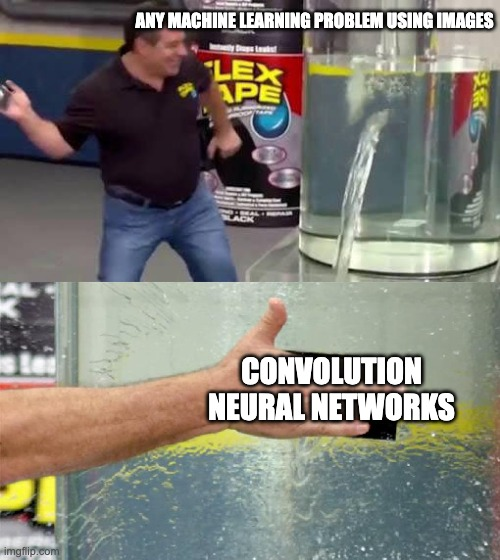

Convolution is a kernel used to extract image features. This is done by computing the dot product between the kernel and a part of the image and this is done repeatedly to extract the features.

Usage:
```py
Conv_layer = tf.keras.layers.Conv2D(filters=,  kernel_size=, input_shape=,padding=)
```

Padding is used so that, the original image doesn’t shrink really fast and to properly utilise edges of an image. 


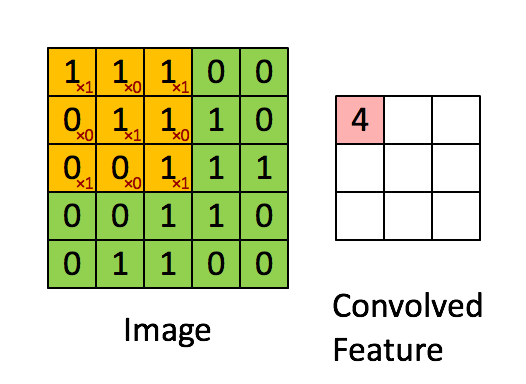

What are strides in Convolution Layer?

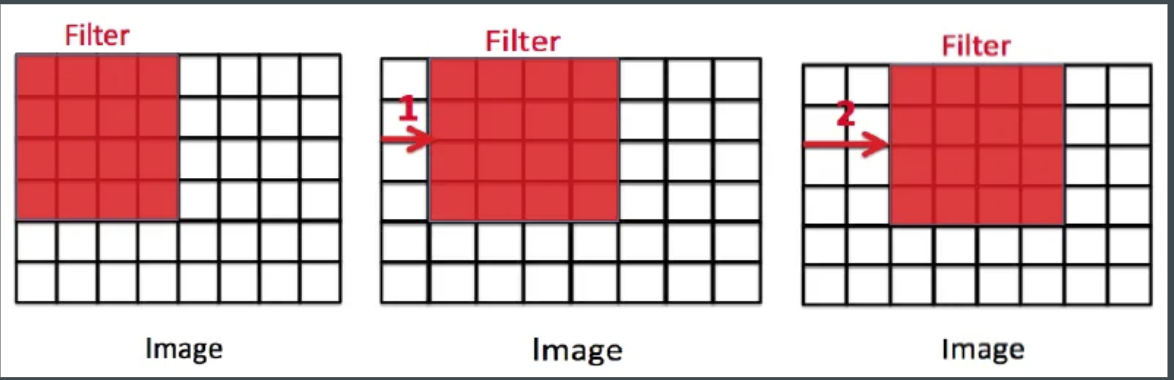

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=25, kernel_size=(3,3),input_shape=(10,10,1)))

model.compile()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 25)          250       
                                                                 
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


##Max Pooling Layer

Max pooling is used to reduce the feature map obtained from convolution all the while retaining the most salient information. This is carried out by taking the maximum value in each of the non-overlapping regions.
            Usage:
```py
 	Max_pool = MaxPooling2D(pool_size=, strides=,padding=,)
   ```

#Other Important Layers

### Flatten Layer

Keras Flatten layer converts multidimensional tensor to single dimensional tensor. For example (32, 28, 28, 3) would be converted to (32, 2352) for image dataset


```py

tf.keras.layers.Flatten()

```

### Dropout Layer

Dropout layer randomly drops out certain percent of input units to layers during training time. This forces to network to balance out and evenly learn more robust and useful features.


```py
tf.keras.layers.Dropout(rate=)
```




### The problem of vanishing gradients and Batch Normalization Layer

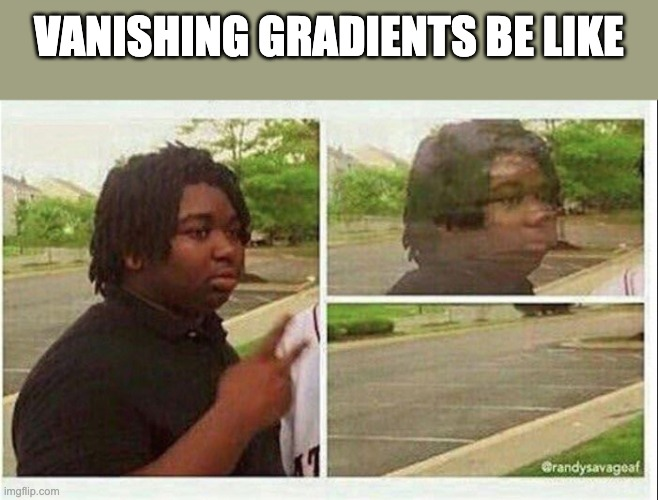

Batch Normalization normalizes activation of previous layer at each batch of training process before applying the activation function. It has many benefits such as reducing effect of exploding or vanishing gradients, faster convergence

```py
tf.keras.layers.BatchNormalization()
```

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(1024, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 1024)      10240     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 1024)     0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 173056)            0         
                                                                 
 dense (Dense)               (None, 128)               22151296  
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 22,162,826
Trainable params: 22,162,826
Non-trainable params: 0
__________________________________________

In [ ]:
# Compile the model
conv_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=7),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
]

# Train the model
history = conv_model.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(x_valid,y_valid),callbacks=my_callbacks)

Epoch 1/30
391/391 [==============================] - 22s 37ms/step - loss: 0.3999 - accuracy: 0.8590 - val_loss: 0.2959 - val_accuracy: 0.8936
Epoch 2/30
391/391 [==============================] - 15s 37ms/step - loss: 0.2553 - accuracy: 0.9077 - val_loss: 0.2648 - val_accuracy: 0.9023
Epoch 3/30
391/391 [==============================] - 15s 37ms/step - loss: 0.2058 - accuracy: 0.9252 - val_loss: 0.2624 - val_accuracy: 0.9065
Epoch 4/30
391/391 [==============================] - 15s 38ms/step - loss: 0.1711 - accuracy: 0.9363 - val_loss: 0.2400 - val_accuracy: 0.9155
Epoch 5/30
391/391 [==============================] - 14s 36ms/step - loss: 0.1396 - accuracy: 0.9485 - val_loss: 0.2529 - val_accuracy: 0.9156
Epoch 6/30
391/391 [==============================] - 14s 36ms/step - loss: 0.1164 - accuracy: 0.9561 - val_loss: 0.2599 - val_accuracy: 0.9176
Epoch 7/30
391/391 [==============================] - 14s 36ms/step - loss: 0.0940 - accuracy: 0.9655 - val_loss: 0.2905 - val_accuracy:

In [ ]:
conv_model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3875 - accuracy: 0.9049


[0.3874526023864746, 0.9049000144004822]

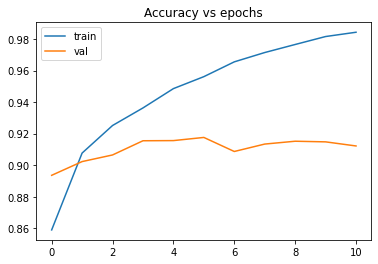

In [ ]:
plt.title('Accuracy vs epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
load_model = tf.keras.models.load_model('/content/model.11-0.39.h5')

# Evolution of Neural Net Architecture

### AlexNet

Alexnet is a groundbreaking model, which is just 8 layers deep. It won the 2012 ILSVRC (Image Large Scale Visual Recognition Challenge) and outperformed other layers at that time. It used the dropout layers to prevent overfitting

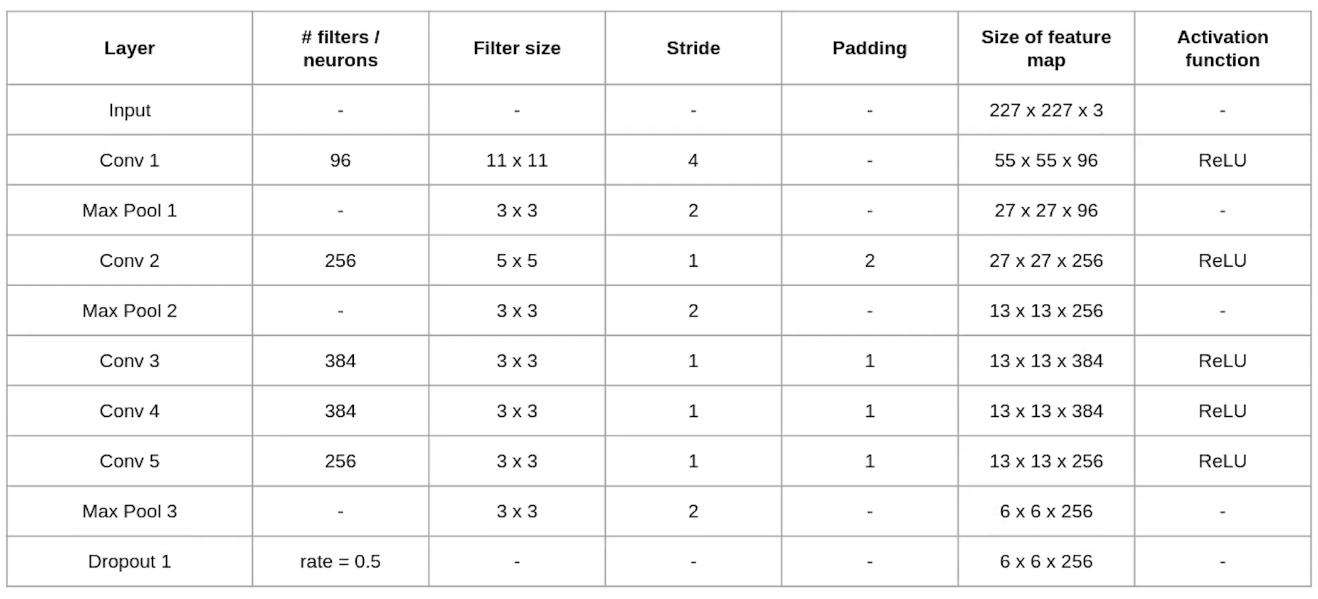

You can calculate the output size of convolution layer after passing it as 
```
output = ((Input-filter size)/stride)+1
```


### Resnet

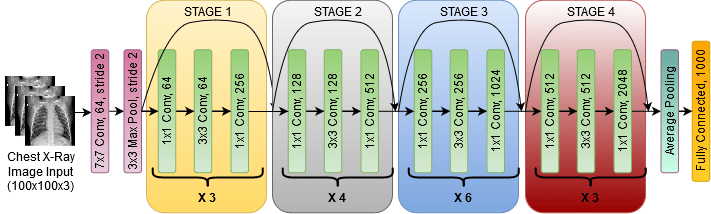

- Resnet is Deep CNN that was introduced in 2015
- This deals with the vanishing gradient problem, which affects the gradient by either making it too low or high, through residual blocks
- Uses the concepts of skip connections. This connects activation of a layer to further layers by skipping some layers in between.
- There are multiple versions of ResNets - ResNet - 18, ResNet - 34, ResNet - 50, etc



### Xception 

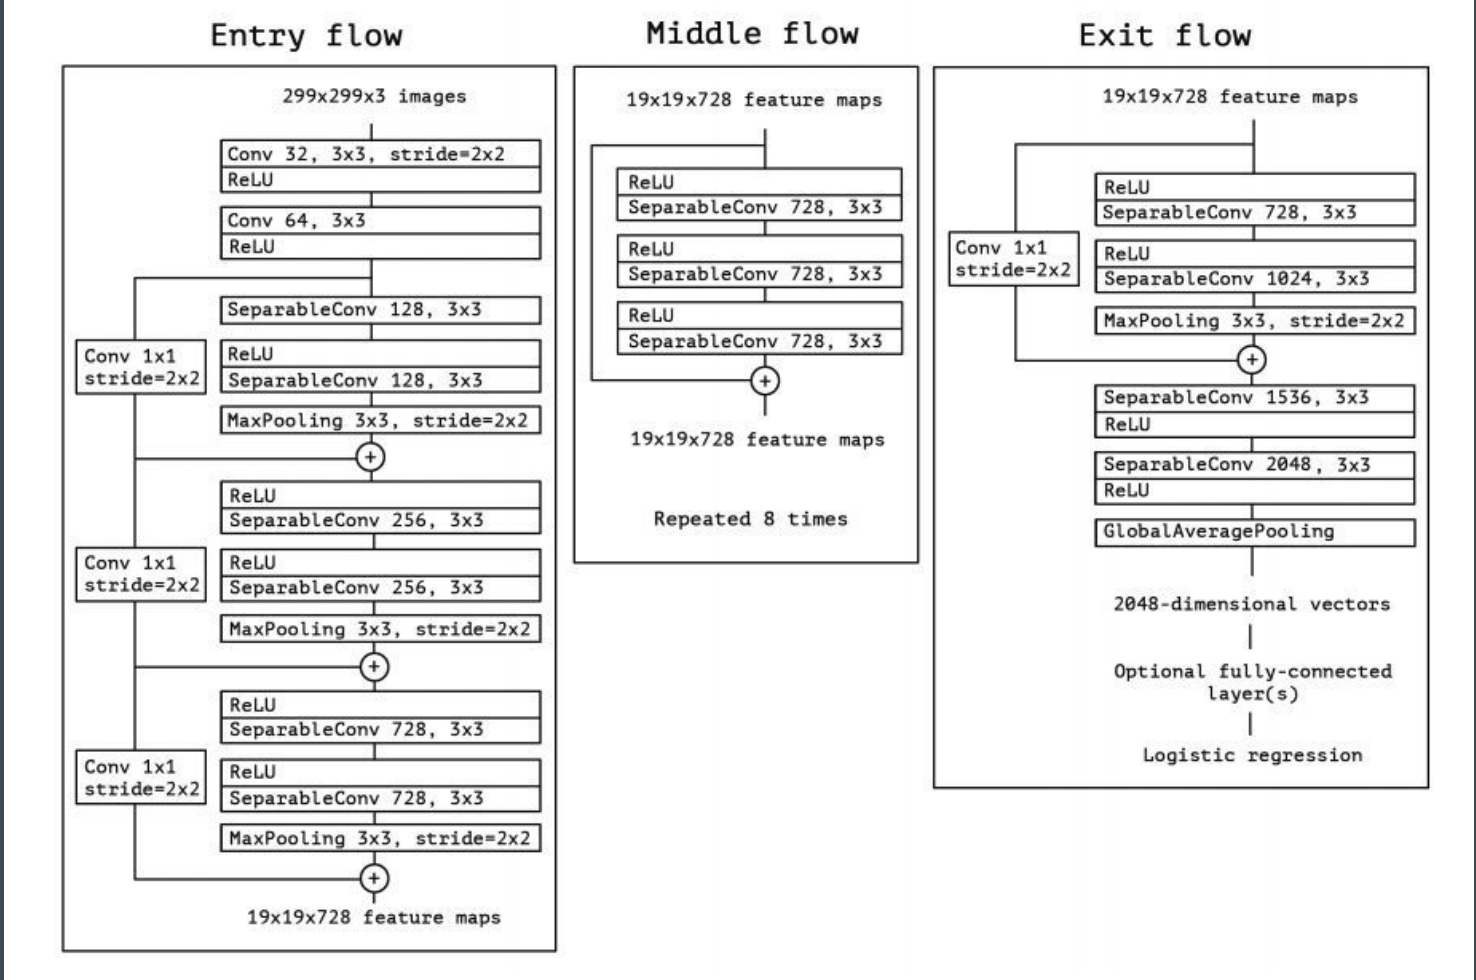

- This architecture was introduced in 2017
- Xception uses Depthwise Seperable Convolution and shortcuts between Conv blocks like Resnet
- The data first goes through the entry flow, then through the middle flow which is repeated eight times, and finally through the exit flow. 
- All Convolution and SeparableConvolution layers are followed by batch normalization.



# Transfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.
   It’s currently very popular in deep learning because it can train deep neural networks with comparatively little data. This is very useful in the data science field since most real-world problems typically do not have millions of labeled data points to train such complex models.



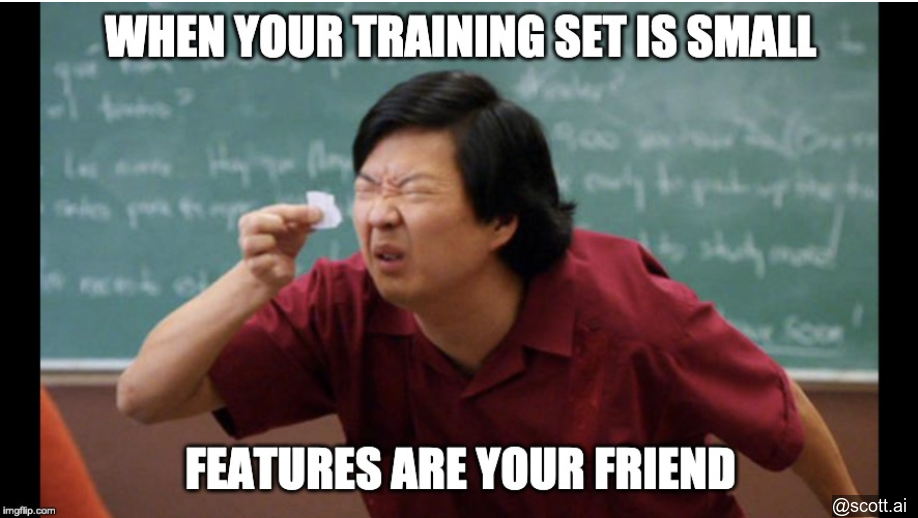

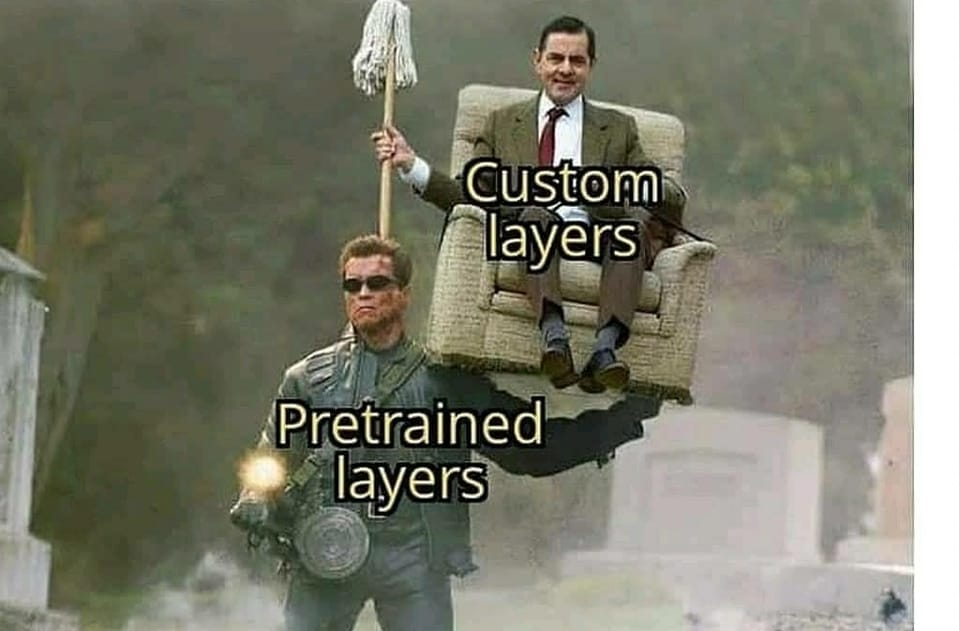

In [ ]:
x_train.shape

(50000, 28, 28)

In [ ]:
x_valid.shape

(10000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
rgb_x_train = np.expand_dims(x_train, -1)
rgb_x_valid = np.expand_dims(x_valid, -1)
rgb_x_test = np.expand_dims(x_test, -1)

In [ ]:
rgb_x_train = rgb_x_train.repeat(3, axis=-1)
rgb_x_valid = rgb_x_valid.repeat(3, axis=-1)
rgb_x_test = rgb_x_test.repeat(3, axis=-1)

In [ ]:
rgb_x_train.shape

(50000, 28, 28, 3)

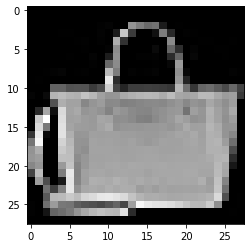

In [ ]:
plt.imshow(rgb_x_train[0])

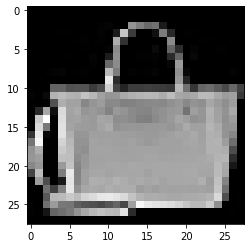

In [ ]:
plt.imshow(x_train[0],cmap='gray')

In [ ]:
base_model = tf.keras.applications.Xception(
    weights='imagenet',
    input_shape=(84,84, 3),
    include_top=False)
# Freeze base model
base_model.trainable = False



83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(28, 28,3))
x = tf.keras.layers.experimental.preprocessing.Resizing(84, 84)(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
transfer_model = tf.keras.Model(inputs, outputs)


In [ ]:
transfer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 resizing (Resizing)         (None, 84, 84, 3)         0         
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               9437696   
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 32)                4128

In [ ]:
# Compile the model
transfer_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
transfer_history = transfer_model.fit(rgb_x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(rgb_x_valid,y_valid), callbacks=tf.keras.callbacks.EarlyStopping(patience=7))

Epoch 1/10
391/391 [==============================] - 44s 91ms/step - loss: 0.5708 - accuracy: 0.8060 - val_loss: 0.4668 - val_accuracy: 0.8422
Epoch 2/10
391/391 [==============================] - 39s 99ms/step - loss: 0.3813 - accuracy: 0.8618 - val_loss: 0.4116 - val_accuracy: 0.8575
Epoch 3/10
391/391 [==============================] - 35s 88ms/step - loss: 0.3330 - accuracy: 0.8769 - val_loss: 0.3572 - val_accuracy: 0.8754
Epoch 4/10
391/391 [==============================] - 40s 101ms/step - loss: 0.3007 - accuracy: 0.8885 - val_loss: 0.3596 - val_accuracy: 0.8754
Epoch 5/10
391/391 [==============================] - 40s 102ms/step - loss: 0.2769 - accuracy: 0.8972 - val_loss: 0.3488 - val_accuracy: 0.8744
Epoch 6/10
391/391 [==============================] - 40s 103ms/step - loss: 0.2534 - accuracy: 0.9055 - val_loss: 0.3612 - val_accuracy: 0.8767
Epoch 7/10
391/391 [==============================] - 40s 103ms/step - loss: 0.2367 - accuracy: 0.9109 - val_loss: 0.3516 - val_accur

In [ ]:
transfer_model.evaluate(rgb_x_test, y_test)

313/313 [==============================] - 8s 22ms/step - loss: 0.3985 - accuracy: 0.8767


[0.39853978157043457, 0.8766999840736389]

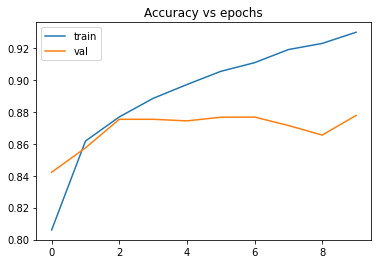

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy vs epochs')
plt.plot(transfer_history.history['accuracy'])
plt.plot(transfer_history.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()

### Thank You

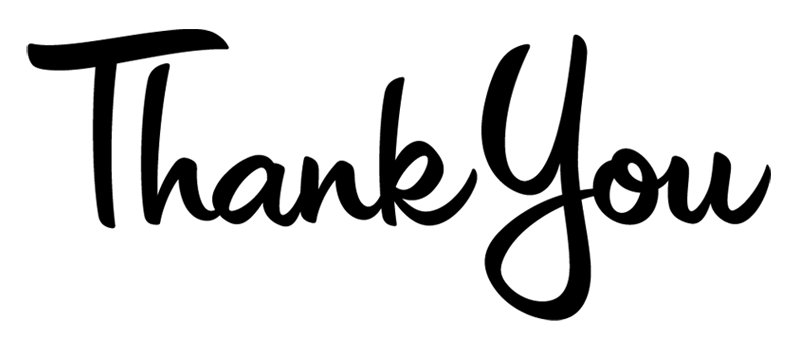